In [484]:
import cdflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

In [532]:
path = 'DATA/dmsp-f16_20110502.cdf'
cdflib.cdf_to_xarray(path)

<xarray.Dataset>
Dimensions:                    (Epoch: 86400, dim0: 3, CHANNEL_ENERGIES: 19,
                                dim1: 19)
Coordinates:
  * Epoch                      (Epoch) float64 6.347e+13 6.347e+13 ... 6.347e+13
  * CHANNEL_ENERGIES           (CHANNEL_ENERGIES) float32 3e+04 ... 30.0
Dimensions without coordinates: dim0, dim1
Data variables: (12/26)
    SC_ECI                     (Epoch, dim0) float64 -273.6 ... -5.473e+03
    SC_ECI_LABEL               (dim0) <U5 'x_ECI' 'y_ECI' 'z_ECI'
    SC_GEOCENTRIC_LAT          (Epoch) float64 -80.07 -80.1 ... -49.25 -49.19
    SC_GEOCENTRIC_LON          (Epoch) float64 37.77 37.47 37.16 ... 287.8 287.8
    SC_GEOCENTRIC_R            (Epoch) float64 7.235e+03 7.235e+03 ... 7.23e+03
    SC_AACGM_LAT               (Epoch) float64 -74.23 -74.2 ... -40.65 -40.6
    ...                         ...
    ION_DIFF_ENERGY_FLUX       (Epoch, CHANNEL_ENERGIES) float32 2.868e+04 .....
    ION_DIFF_ENERGY_FLUX_STD   (Epoch, CHANNEL_ENERGIES) float32 1.118 ... nan
    ION_TOTAL_ENERGY_FLUX      (Epoch) float32 6.907e+09 6.961e+09 ... 0.0
    ION_TOTAL_ENERGY_FLUX_STD  (Epoch) float32 0.3838 0.3954 0.3604 ... 1.84 nan
    ION_AVG_ENERGY             (Epoch) float32 7.712e+03 6.878e+03 ... nan
    ION_AVG_ENERGY_STD         (Epoch) float32 0.5086 0.5146 0.5117 ... 2.66 nan
Attributes: (12/26)
    Project:                     DMSP
    Source_name:                 dmsp-f16
    Discipline:                  ['Space Physics>Magnetospheric Science', 'Sp...
    Data_type:                   precipitating-electrons-ions
    Descriptor:                  ssj
    File_naming_convention:      source_descriptor_datatype_yyyyMMdd
    ...                          ...
    MODS:                        This is version 1, beta.
    LINK_TEXT:                   NGDC Solar & Terrestrial Physics Satellite D...
    LINK_TITLE:                  NGDC STP Satellite Data Services
    HTTP_LINK:                   http://www.ngdc.noaa.gov/stp/satellite/satda...
    DWELL_TIME:                  The count integration time at each energy st...
    VERSION:                      1.1.2

In [533]:
cdf_file = cdflib.CDF(path)
ion = cdf_file['ION_DIFF_ENERGY_FLUX']
ele = cdf_file['ELE_DIFF_ENERGY_FLUX']
channel = cdf_file['CHANNEL_ENERGIES']

In [534]:
from datetime import datetime


a = cdflib.cdfepoch.unixtime(cdf_file['Epoch'])
date = [datetime.utcfromtimestamp(aa) for aa in a]

Exception ignored in: <function CDF.__del__ at 0x7fd8f05abd30>
Traceback (most recent call last):
  File "/Users/umedayusuke/研究室/修論/env/lib/python3.8/site-packages/cdflib/cdfread.py", line 181, in __del__
    if self.temp_file is not None:
AttributeError: 'CDF' object has no attribute 'temp_file'
Exception ignored in: <function CDF.__del__ at 0x7fd8f05abd30>
Traceback (most recent call last):
  File "/Users/umedayusuke/研究室/修論/env/lib/python3.8/site-packages/cdflib/cdfread.py", line 181, in __del__
    if self.temp_file is not None:
AttributeError: 'CDF' object has no attribute 'temp_file'


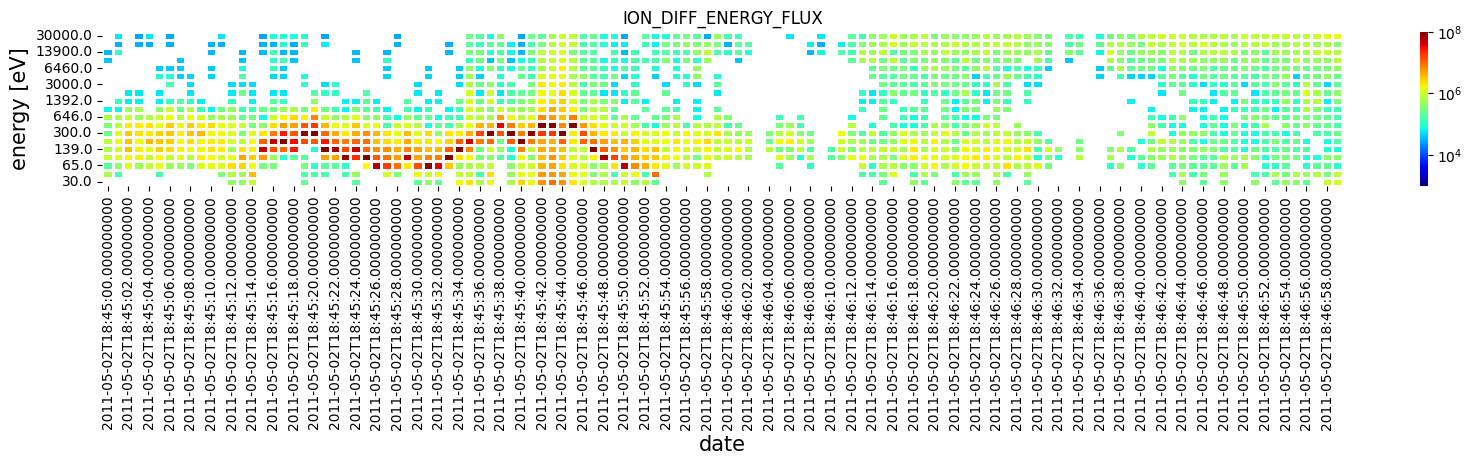

In [535]:
st = 67500
et = st + 120
df_ion = pd.DataFrame(ion.T[:, st:et], columns=date[st:et], index=channel)
df_ion_mask = (df_ion == 0)
plt.figure(figsize=(20,2))
sns.heatmap(df_ion, linewidths = 1,cmap = "jet", mask = df_ion_mask, norm=LogNorm(vmin=1e3,vmax=1e8))
plt.title('ION_DIFF_ENERGY_FLUX')
plt.xlabel('date', fontsize=15)
plt.ylabel('energy [eV]', fontsize=15);

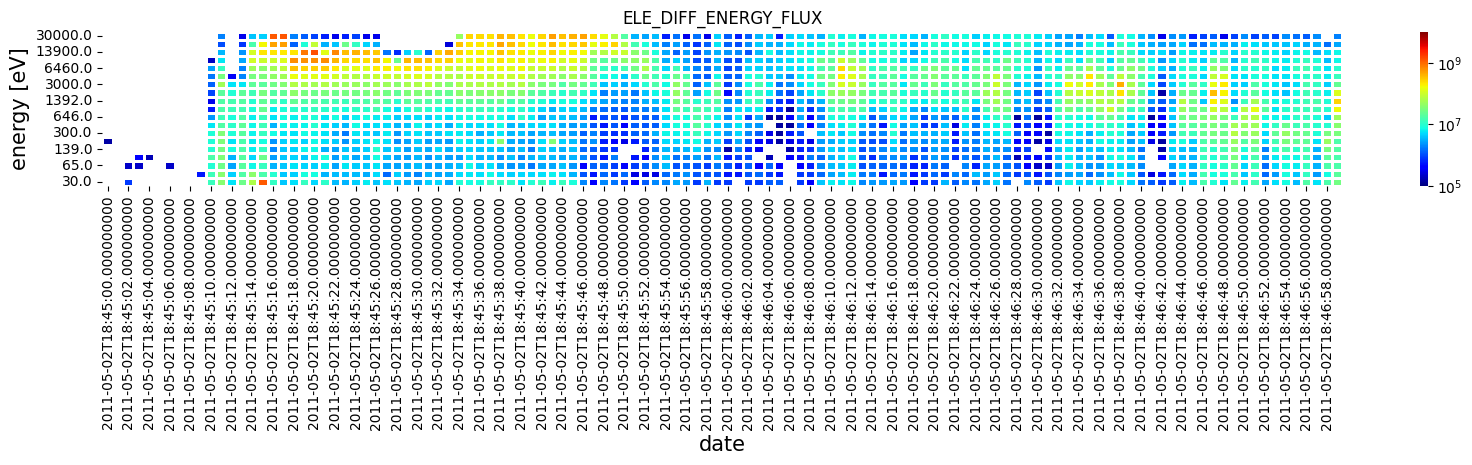

In [536]:
st = 67500
et = st + 120

df_ele = pd.DataFrame(ele.T[:, st:et], columns=date[st:et], index=channel)
df_ele_mask = (df_ele == 0)
plt.figure(figsize=(20,2))
sns.heatmap(df_ele, linewidths = 1,cmap = "jet", mask = df_ele_mask, norm=LogNorm(vmin=1e5,vmax=1e10))
plt.title('ELE_DIFF_ENERGY_FLUX')
plt.xlabel('date', fontsize=15)
plt.ylabel('energy [eV]', fontsize=15);

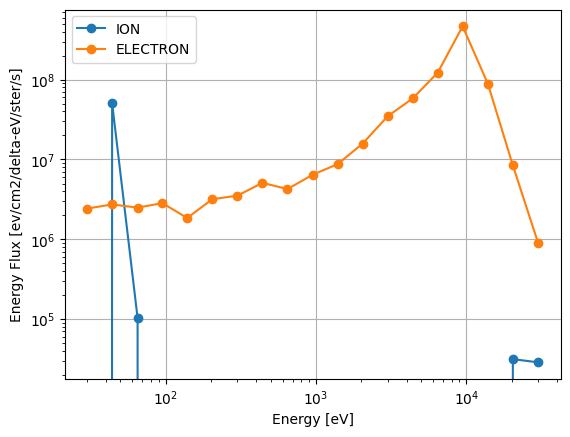

In [537]:
def plot_fig(id, ion, ele):
    plt.plot(channel, ion[id], marker='o', label='ION')
    plt.plot(channel, ele[id], marker='o', label='ELECTRON')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Energy [eV]')
    plt.ylabel('Energy Flux [ev/cm2/delta-eV/ster/s]')
    plt.grid()
    plt.legend()

plot_fig(61495, ion, ele)

In [538]:
df = np.array([ion.max(axis=1), ele.max(axis=1)])
df = pd.DataFrame(df.T, columns=['ION', 'ELECTRON'], index=date)

In [539]:
df

,ION,ELECTRON
2011-05-02 00:00:00,1.272880e+06,1.372338e+07
2011-05-02 00:00:01,1.272880e+06,5.862618e+06
2011-05-02 00:00:02,1.118591e+06,1.063947e+07
2011-05-02 00:00:03,1.195735e+06,1.820008e+07
2011-05-02 00:00:04,1.272880e+06,1.820008e+07
...,...,...
2011-05-02 23:59:55,2.156155e+05,3.018722e+05
2011-05-02 23:59:56,0.000000e+00,0.000000e+00
2011-05-02 23:59:57,0.000000e+00,0.000000e+00
2011-05-02 23:59:58,1.148218e+05,6.037443e+05


In [540]:
df_min = df.groupby(pd.Grouper(freq='min')).mean()

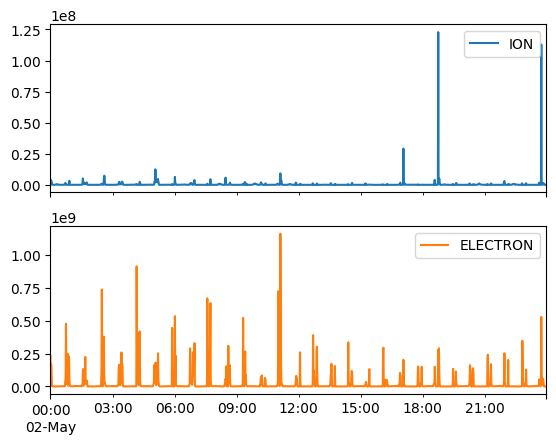

In [541]:
df_min.plot(subplots=True)
plt.legend();

In [542]:
tmp = []
for i, e in enumerate(ele):
    if any(e[:3] > 10**8):
        tmp.append(i)

In [575]:
import scipy.stats as stats

# スミルノフ･グラブス検定
def smirnov_grubbs(data, alpha):
    x, o = list(data), []
    while len(x) > 2:
        n = len(x)
        t = stats.t.isf(q=(alpha / n) / 2, df=n - 2)
        tau = (n - 1) * t / np.sqrt(n * (n - 2) + n * t * t)
        i_min, i_max = np.argmin(x), np.argmax(x)
        myu, std = np.mean(x), np.std(x, ddof=1)
        i_far = i_max if np.abs(x[i_max] - myu) > np.abs(x[i_min] - myu) else i_min
        tau_far = np.abs((x[i_far] - myu) / std)
        if tau_far < tau: 
            break
        o.append(x.pop(i_far))
    return np.array(o)

def detect_charge(ion, electron):
    check_id_list = []
    alpha = 0.01
    charge_id = []
    for i, ele in enumerate(electron):
        if any(ele[:3] > 1e8):
            check_id_list.append(i)

    for i in check_id_list:
        check_ion = ion[i][ion[i] > 0]
        if len(check_ion) <= 2:
            continue
        out_array = smirnov_grubbs(check_ion, alpha)
        if len(out_array) > 0 and any(out_array > 1e7):
            ch = np.where(ion[i] == out_array.max())[0]
            charge_id.append((i, ch[0]))
    return charge_id


In [576]:
ind = detect_charge(ion ,ele)

In [577]:
ind

[(140, 18),
 (61493, 15),
 (61499, 16),
 (67515, 14),
 (67516, 13),
 (67517, 13),
 (67519, 12),
 (67520, 12),
 (67521, 14),
 (67522, 14),
 (67523, 15),
 (67524, 14),
 (67525, 15),
 (67526, 16),
 (67532, 16),
 (67533, 15),
 (67534, 14),
 (67535, 13),
 (67536, 12),
 (67537, 12),
 (67538, 11),
 (67539, 12),
 (67540, 13),
 (67541, 12),
 (67542, 11),
 (67543, 11),
 (67544, 12),
 (67545, 11),
 (67546, 12),
 (67547, 14),
 (67548, 15),
 (67549, 15),
 (85448, 17),
 (85449, 18),
 (85455, 18),
 (85456, 18),
 (85458, 18),
 (85459, 18),
 (85461, 18),
 (85462, 18),
 (85464, 17),
 (85467, 17),
 (85470, 18)]

67534
[3.5584477e+08 1.1858186e+07]


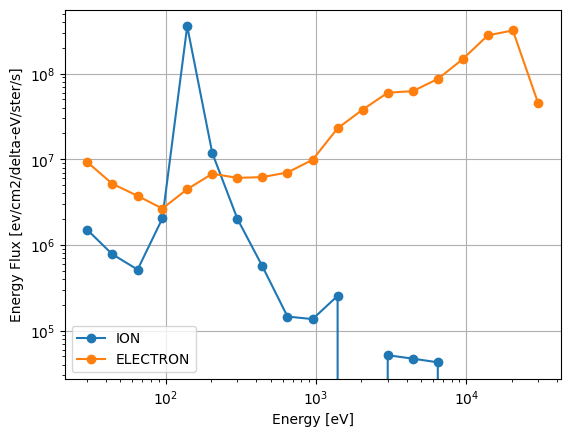

In [554]:
id = ind[16]
a = ion[id][ion[id] > 0]
alpha = 0.01
print(id)
print(smirnov_grubbs(a, alpha))
plot_fig(id, ion, ele)

In [555]:
lat = abs(cdf_file['SC_AACGM_LAT'])
lon = cdf_file['SC_AACGM_LTIME'] * np.pi / 12
La = []
Lo = []
for i in ind:
    # pos.append((lat[i], lon[i]))
    La.append(lat[i])
    Lo.append(lon[i])

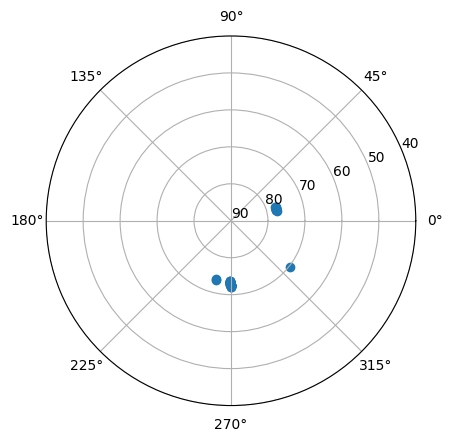

In [556]:
ax = plt.subplot(111, projection="polar")
ax.scatter(Lo, La)
ax.set_ylim([90,40])
plt.show()

In [512]:
def plot_charge_pos(path):
    cdf_file = cdflib.CDF(path)
    ion = cdf_file['ION_DIFF_ENERGY_FLUX']
    ele = cdf_file['ELE_DIFF_ENERGY_FLUX']
    lat = abs(cdf_file['SC_AACGM_LAT'])
    lon = cdf_file['SC_AACGM_LTIME'] * np.pi / 12
    ind = detect_charge(ion ,ele)
    La = []
    Lo = []
    for i in ind:
        La.append(lat[i])
        Lo.append(lon[i])
    return La, Lo

In [549]:
La_16, Lo_16 = plot_charge_pos('../DATA/dmsp-f16/2011/05/dmsp-f16_20110503.cdf')
La_17, Lo_17 = plot_charge_pos('../DATA/dmsp-f17/2011/05/dmsp-f17_20110502.cdf')
La_18, Lo_18 = plot_charge_pos('../DATA/dmsp-f18/2011/05/dmsp-f18_20110502.cdf')

4893
4902
4903
4904
4905
4906
4908
4909
4910
4911
4921
4928
4929
4945
5208
5209
5210
5211
5213
5214
5215
5216
5220
5221
5223
5224
5225
5228
5364
5457
5459
5460
5462
5519
5520
11182
11183
11184
54774
66811
66814
66815
72736
72737
72738
72739
72740
72741
72742
72743
72849
85032
85040
912
913
915
916
918
919
920
1564
1566
7263
7265
7266
7267
7277
7279
7281
7282
7283
7284
7285
7286
13380
13381
13382
13384
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13402
13403
13404
13405
13406
13407
13408
13411
13415
13416
13417
13418
13419
13420
13421
13425
13426
13427
13431
13435
13914
13915
13916
13917
13918
13919
13920
13923
13957
13967
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13991
13992
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14005
14006
14007
14008
14009
14010
14011
14012
14013
14016
19692
25798
25804
25805
25823
25825
37972
37973
37974
37975
37976
37977
37978
37980
3

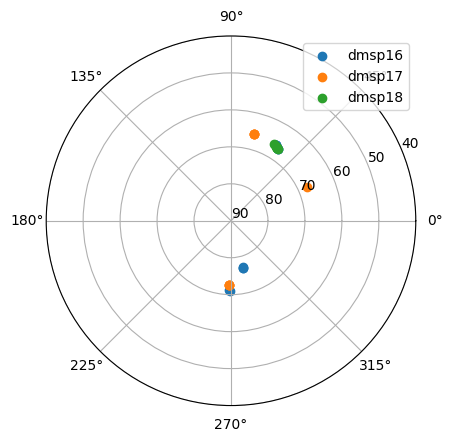

In [550]:
ax = plt.subplot(111, projection="polar")


ax.scatter(Lo_16, La_16, label='dmsp16')
ax.scatter(Lo_17, La_17, label='dmsp17')
ax.scatter(Lo_18, La_18, label='dmsp18')
ax.set_ylim([90, 40])
plt.legend()
plt.show()